## Importing packages and libraries



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Parsing forecast data

In [2]:
forecast_df = pd.read_csv('data/windpowerforecasts.dat', delimiter = ';')
forecast_df['dato'] = pd.to_datetime(forecast_df['dato'], format='%Y%m%d%H%M',)
forecast_df['dati'] = pd.to_datetime(forecast_df['dati'], format='%Y%m%d%H%M',)
forecast_df['time'] = forecast_df.dati.apply(lambda x: x.time())
forecast_df = forecast_df[forecast_df['time'] == pd.to_datetime('12:00').time()]
forecast_df = forecast_df[forecast_df['hors'] >= 12]
forecast_df = forecast_df[forecast_df['hors'] < 36].reset_index()
forecast_df = forecast_df.drop([8760], axis=0)
days_out = forecast_df['dato'][forecast_df['meas'].isnull()].values
days_out_index = forecast_df['dato'][forecast_df['meas'].isnull()].index
forecast_df = forecast_df.fillna(0)

## Parsing data of Day-ahead prices 2013-2017

In [3]:
prices_dayahead_2013_raw_data = pd.read_html('data/elspot-prices_2013_hourly_dkk.xls')[0].values
prices_dayahead_2013 = pd.DataFrame(prices_dayahead_2013_raw_data)
prices_dayahead_2013 = prices_dayahead_2013.drop([2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19],axis=1)
prices_dayahead_2013.columns = ['Dates', 'Hours', 'DK1']
prices_dayahead_2013['Hours'] = prices_dayahead_2013['Hours'].str.slice(stop=2)
prices_dayahead_2013['ts'] = pd.to_datetime(prices_dayahead_2013['Dates'] + prices_dayahead_2013['Hours'] + ':00', format='%d-%m-%Y%H:%M')
prices_dayahead_2013 = prices_dayahead_2013.drop(['Dates','Hours'],axis=1)
prices_dayahead_2013['DK1'] = prices_dayahead_2013['DK1']/100
prices_dayahead_2013 = prices_dayahead_2013.set_index('ts')
prices_dayahead_2013 = prices_dayahead_2013.drop(prices_dayahead_2013['2013-06-07 07:00:00':'2013-06-07 11:00:00'].index)

In [4]:
prices_dayahead_2014_raw_data = pd.read_html('data/elspot-prices_2014_hourly_dkk.xls')[0].values
prices_dayahead_2014 = pd.DataFrame(prices_dayahead_2014_raw_data)
prices_dayahead_2014 = prices_dayahead_2014.drop([2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18],axis=1)
prices_dayahead_2014.columns = ['Dates', 'Hours', 'DK1']
prices_dayahead_2014['Hours'] = prices_dayahead_2014['Hours'].str.slice(stop=2)
prices_dayahead_2014['ts'] = pd.to_datetime(prices_dayahead_2014['Dates'] + prices_dayahead_2014['Hours'] + ':00', format='%d-%m-%Y%H:%M')
prices_dayahead_2014 = prices_dayahead_2014.drop(['Dates','Hours'],axis=1)
prices_dayahead_2014['DK1'] = prices_dayahead_2014['DK1']/100
prices_dayahead_2014 = prices_dayahead_2014.set_index('ts')

In [5]:
prices_dayahead_2015_raw_data = pd.read_html('data/elspot-prices_2015_hourly_dkk.xls')[0].values
prices_dayahead_2015 = pd.DataFrame(prices_dayahead_2015_raw_data)
prices_dayahead_2015 = prices_dayahead_2015.drop([2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19],axis=1)
prices_dayahead_2015.columns = ['Dates', 'Hours', 'DK1']
prices_dayahead_2015['Hours'] = prices_dayahead_2015['Hours'].str.slice(stop=2)
prices_dayahead_2015['ts'] = pd.to_datetime(prices_dayahead_2015['Dates'] + prices_dayahead_2015['Hours'] + ':00', format='%d-%m-%Y%H:%M')
prices_dayahead_2015 = prices_dayahead_2015.drop(['Dates','Hours'],axis=1)
prices_dayahead_2015['DK1'] = prices_dayahead_2015['DK1']/100
prices_dayahead_2015 = prices_dayahead_2015.set_index('ts')

In [6]:
prices_dayahead_2016_raw_data = pd.read_html('data/elspot-prices_2016_hourly_dkk.xls')[0].values
prices_dayahead_2016 = pd.DataFrame(prices_dayahead_2016_raw_data)
prices_dayahead_2016 = prices_dayahead_2016.drop([2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19],axis=1)
prices_dayahead_2016.columns = ['Dates', 'Hours', 'DK1']
prices_dayahead_2016['Hours'] = prices_dayahead_2016['Hours'].str.slice(stop=2)
prices_dayahead_2016['ts'] = pd.to_datetime(prices_dayahead_2016['Dates'] + prices_dayahead_2016['Hours'] + ':00', format='%d-%m-%Y%H:%M')
prices_dayahead_2016 = prices_dayahead_2016.drop(['Dates','Hours'],axis=1)
prices_dayahead_2016['DK1'] = prices_dayahead_2016['DK1']/100
prices_dayahead_2016 = prices_dayahead_2016.set_index('ts')

In [7]:
prices_dayahead_2017_raw_data = pd.read_html('data/elspot-prices_2017_hourly_dkk.xls')[0].values
prices_dayahead_2017 = pd.DataFrame(prices_dayahead_2017_raw_data)
prices_dayahead_2017 = prices_dayahead_2017.drop([2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18],axis=1)
prices_dayahead_2017.columns = ['Dates', 'Hours', 'DK1']
prices_dayahead_2017['Hours'] = prices_dayahead_2017['Hours'].str.slice(stop=2)
prices_dayahead_2017['ts'] = pd.to_datetime(prices_dayahead_2017['Dates'] + prices_dayahead_2017['Hours'] + ':00', format='%d-%m-%Y%H:%M')
prices_dayahead_2017 = prices_dayahead_2017.drop(['Dates','Hours'],axis=1)
prices_dayahead_2017['DK1'] = prices_dayahead_2017['DK1']/100
prices_dayahead_2017 = prices_dayahead_2017.set_index('ts')

## Parsing data of Regulating market prices for 2016 and 2017

In [8]:
prices_regulating_2013_raw_data = pd.read_html('data/regulating-prices_2013_hourly_dkk.xls')[0].values
prices_regulating_2013 = pd.DataFrame(prices_regulating_2013_raw_data)
prices_regulating_2013 = prices_regulating_2013.drop([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,24,25],axis=1)
prices_regulating_2013.columns = ['Dates', 'Hours', 'DK1_up', 'DK1_down']
prices_regulating_2013['Hours'] = prices_regulating_2013['Hours'].str.slice(stop=2)
prices_regulating_2013['ts'] = pd.to_datetime(prices_regulating_2013['Dates'] + prices_regulating_2013['Hours'] + ':00', format='%d-%m-%Y%H:%M')
prices_regulating_2013 = prices_regulating_2013.drop(['Dates','Hours'],axis=1)
prices_regulating_2013['DK1_up'] = prices_regulating_2013['DK1_up']/100
prices_regulating_2013['DK1_down'] = prices_regulating_2013['DK1_down']/100
prices_regulating_2013 = prices_regulating_2013.set_index('ts')
prices_regulating_2013 = prices_regulating_2013.drop(prices_regulating_2013['2013-06-07 07:00:00':'2013-06-07 11:00:00'].index)

In [9]:
prices_regulating_2014_raw_data = pd.read_html('data/regulating-prices_2014_hourly_dkk.xls')[0].values
prices_regulating_2014 = pd.DataFrame(prices_regulating_2014_raw_data)
prices_regulating_2014 = prices_regulating_2014.drop([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,24,25],axis=1)
prices_regulating_2014.columns = ['Dates', 'Hours', 'DK1_up', 'DK1_down']
prices_regulating_2014['Hours'] = prices_regulating_2014['Hours'].str.slice(stop=2)
prices_regulating_2014['ts'] = pd.to_datetime(prices_regulating_2014['Dates'] + prices_regulating_2014['Hours'] + ':00', format='%d-%m-%Y%H:%M')
prices_regulating_2014 = prices_regulating_2014.drop(['Dates','Hours'],axis=1)
prices_regulating_2014['DK1_up'] = prices_regulating_2014['DK1_up']/100
prices_regulating_2014['DK1_down'] = prices_regulating_2014['DK1_down']/100
prices_regulating_2014 = prices_regulating_2014.set_index('ts')

In [10]:
prices_regulating_2015_raw_data = pd.read_html('data/regulating-prices_2015_hourly_dkk.xls')[0].values
prices_regulating_2015 = pd.DataFrame(prices_regulating_2015_raw_data)
prices_regulating_2015 = prices_regulating_2015.drop([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,24,25],axis=1)
prices_regulating_2015.columns = ['Dates', 'Hours', 'DK1_up', 'DK1_down']
prices_regulating_2015['Hours'] = prices_regulating_2015['Hours'].str.slice(stop=2)
prices_regulating_2015['ts'] = pd.to_datetime(prices_regulating_2015['Dates'] + prices_regulating_2015['Hours'] + ':00', format='%d-%m-%Y%H:%M')
prices_regulating_2015 = prices_regulating_2015.drop(['Dates','Hours'],axis=1)
prices_regulating_2015['DK1_up'] = prices_regulating_2015['DK1_up']/100
prices_regulating_2015['DK1_down'] = prices_regulating_2015['DK1_down']/100
prices_regulating_2015 = prices_regulating_2015.set_index('ts')

In [11]:
prices_regulating_2016_raw_data = pd.read_html('data/regulating-prices_2016_hourly_dkk.xls')[0].values
prices_regulating_2016 = pd.DataFrame(prices_regulating_2016_raw_data)
prices_regulating_2016 = prices_regulating_2016.drop([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,24,25],axis=1)
prices_regulating_2016.columns = ['Dates', 'Hours', 'DK1_up', 'DK1_down']
prices_regulating_2016['Hours'] = prices_regulating_2016['Hours'].str.slice(stop=2)
prices_regulating_2016['ts'] = pd.to_datetime(prices_regulating_2016['Dates'] + prices_regulating_2016['Hours'] + ':00', format='%d-%m-%Y%H:%M')
prices_regulating_2016 = prices_regulating_2016.drop(['Dates','Hours'],axis=1)
prices_regulating_2016['DK1_up'] = prices_regulating_2016['DK1_up']/100
prices_regulating_2016['DK1_down'] = prices_regulating_2016['DK1_down']/100
prices_regulating_2016 = prices_regulating_2016.set_index('ts')

In [12]:
prices_regulating_2017_raw_data = pd.read_html('data/regulating-prices_2017_hourly_dkk.xls')[0].values
prices_regulating_2017 = pd.DataFrame(prices_regulating_2017_raw_data)
prices_regulating_2017 = prices_regulating_2017.drop([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,24,25],axis=1)
prices_regulating_2017.columns = ['Dates', 'Hours', 'DK1_up', 'DK1_down']
prices_regulating_2017['Hours'] = prices_regulating_2017['Hours'].str.slice(stop=2)
prices_regulating_2017['ts'] = pd.to_datetime(prices_regulating_2017['Dates'] + prices_regulating_2017['Hours'] + ':00', format='%d-%m-%Y%H:%M')
prices_regulating_2017 = prices_regulating_2017.drop(['Dates','Hours'],axis=1)
prices_regulating_2017['DK1_up'] = prices_regulating_2017['DK1_up']/100
prices_regulating_2017['DK1_down'] = prices_regulating_2017['DK1_down']/100
prices_regulating_2017 = prices_regulating_2017.set_index('ts')

## Joining price data in single dataframe

In [30]:
prices_regulating = pd.concat([prices_regulating_2013, prices_regulating_2014, prices_regulating_2015, prices_regulating_2016, prices_regulating_2017])
prices_dayahed = pd.concat([prices_dayahead_2013, prices_dayahead_2014, prices_dayahead_2015,prices_dayahead_2016, prices_dayahead_2017])
prices = prices_dayahed.join(prices_regulating)
prices = prices[~prices.index.duplicated(keep='first')]
for i in days_out:
    prices.loc[i] = 0

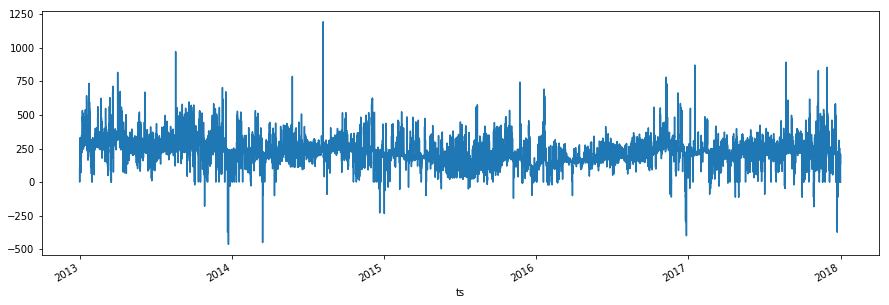

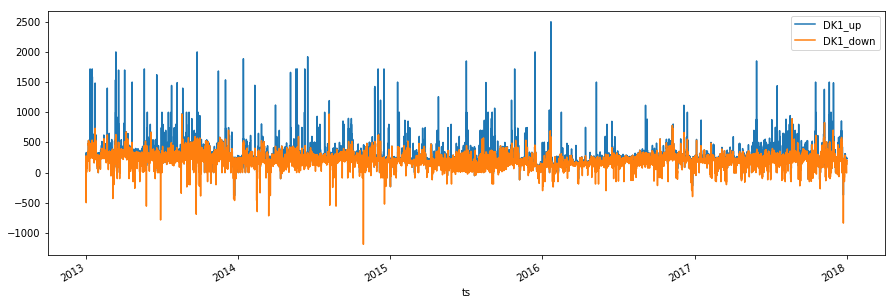

In [31]:
prices['DK1'].plot(figsize=(15,5))
prices.drop(columns=['DK1']).plot(figsize=(15,5))

## Reference - Perfect solution

In [32]:
reference = pd.DataFrame()
reference = prices[prices.index.year == 2017].drop(['DK1_up', 'DK1_down'],axis=1)
reference['Production'] = forecast_df['meas'].values/1000
reference['Revenue'] = reference['Production']*reference['DK1']
reference_revenue = reference['Revenue'].sum()
reference.head()

,DK1,Production,Revenue
ts,,,
2017-01-01 00:00:00,155.82,147.661,23008.5
2017-01-01 01:00:00,155.37,144.796,22497
2017-01-01 02:00:00,134.78,138.824,18710.7
2017-01-01 03:00:00,119.17,139.307,16601.2
2017-01-01 04:00:00,122.14,139.602,17051


In [33]:
print('The revenue for reference: {}'.format(reference_revenue))

The revenue for reference: 145708889.59247047


## Strategy 1 - Based on historical data

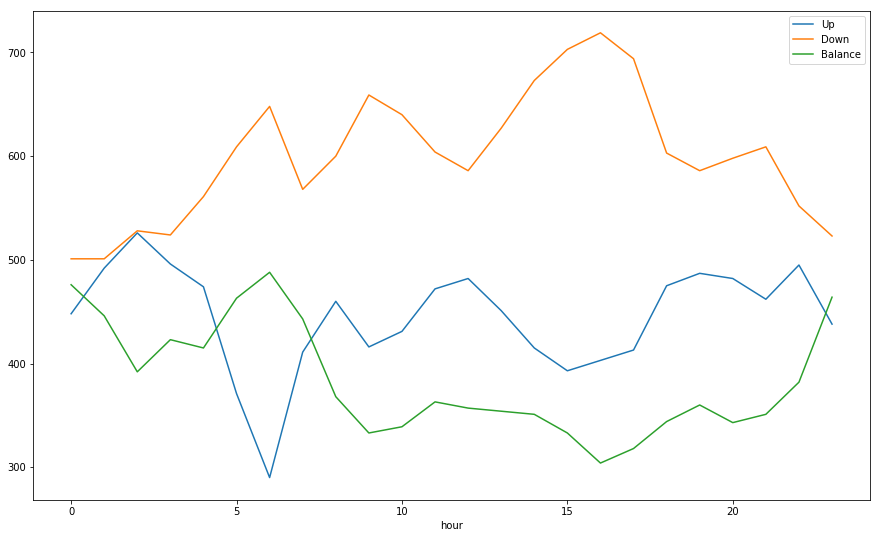

In [34]:
prices_hist = prices[prices.index.year != 2017]
prices_hist = prices_hist.astype(float).round({'DK1': 0, 'DK1_up': 0, 'DK1_down': 0})
prices_hist['Down'] = ((prices_hist['DK1'] == prices_hist['DK1_up']) & (prices_hist['DK1_down'] != prices_hist['DK1_up']))
prices_hist['Up'] = ((prices_hist['DK1'] == prices_hist['DK1_down']) & (prices_hist['DK1_down'] != prices_hist['DK1_up']))
prices_hist['Balance'] = (prices_hist['DK1_up'] == prices_hist['DK1_down'])
prices_hist = prices_hist*1
prices_hist['hour'] = prices_hist.index.hour
prices_hist['month'] = prices_hist.index.month
hist_up_down = prices_hist.groupby('hour').agg({"Up": "sum", "Down": "sum", "Balance": "sum"})
hist_up_down.plot(figsize=(15,9))

In [35]:
strategy1 = pd.DataFrame()
strategy1 = prices[prices.index.year == 2017]
strategy1['Bid'] = 160
strategy1['Production'] = forecast_df['meas'].values/1000
strategy1['Dayahead Revenue'] = strategy1['Bid']*strategy1['DK1']
strategy1['Delta'] = strategy1['Production'] - strategy1['Bid']
strategy1['Regulation Revenue'] = strategy1['Delta']*strategy1['DK1_up']
strategy1_revenue = strategy1['Regulation Revenue'].sum() + strategy1['Dayahead Revenue'].sum()
strategy1_ratio = strategy1_revenue/reference_revenue

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

## Strategy 2 - Deterministic

In [36]:
strategy2 = pd.DataFrame()
strategy2 = prices[prices.index.year == 2017]
strategy2['Bid'] = 1.02*forecast_df['fore'].values/1000
strategy2['Production'] = forecast_df['meas'].values/1000
strategy2['Dayahead Revenue'] = strategy2['Bid']*strategy2['DK1']
strategy2['Delta'] = strategy2['Production'] - strategy2['Bid']
strategy2_up = strategy2[strategy2['Delta'] <= 0]
strategy2_down = strategy2[strategy2['Delta'] > 0]
strategy2_up['Regulation Revenue'] = strategy2_up['DK1_up']*strategy2_up['Delta']
strategy2_down['Regulation Revenue'] = strategy2_down['DK1_down']*strategy2_down['Delta']

strategy2_revenue = strategy2_up['Regulation Revenue'].sum() + strategy2_up['Dayahead Revenue'].sum() + strategy2_down['Regulation Revenue'].sum() + strategy2_down['Dayahead Revenue'].sum()
strategy2_ratio = strategy2_revenue/reference_revenue

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

## Strategy 3 - Probabilistic 

In [37]:
alpha_hist = prices_hist.drop(columns=['Up', 'Down', 'Balance'])
alpha_hist['pi+'] = (prices_hist['DK1'] - prices_hist['DK1_down'])
alpha_hist['pi-'] = (prices_hist['DK1_up'] - prices_hist['DK1'])

Using mean optimal alpha of the year: 

In [38]:
pi_plus = alpha_hist['pi+'].mean()
pi_minus = alpha_hist['pi-'].mean()
alpha_year = pi_plus/(pi_plus+pi_minus)
alpha_year

0.5192804344789134

Calcuating revenue

In [39]:
strategy3 = pd.DataFrame()
strategy3 = prices[prices.index.year == 2017]
strategy3['Bid'] = forecast_df['q50'].values/1000
strategy3['Production'] = forecast_df['meas'].values/1000
strategy3['Dayahead Revenue'] = strategy3['Bid']*strategy3['DK1']
strategy3['Delta'] = strategy3['Production'] - strategy3['Bid']
strategy3_up = strategy3[strategy3['Delta'] <= 0]
strategy3_down = strategy3[strategy3['Delta'] > 0]
strategy3_up['Regulation Revenue'] = strategy3_up['DK1_up']*strategy3_up['Delta']
strategy3_down['Regulation Revenue'] = strategy3_down['DK1_down']*strategy3_down['Delta']

strategy3_revenue = strategy3_up['Regulation Revenue'].sum() + strategy3_up['Dayahead Revenue'].sum() + strategy3_down['Regulation Revenue'].sum() + strategy3_down['Dayahead Revenue'].sum()
strategy3_ratio = strategy3_revenue/reference_revenue
strategy3_ratio

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

0.9704545469642853

Using mean optimal alpha for 24 hours: 

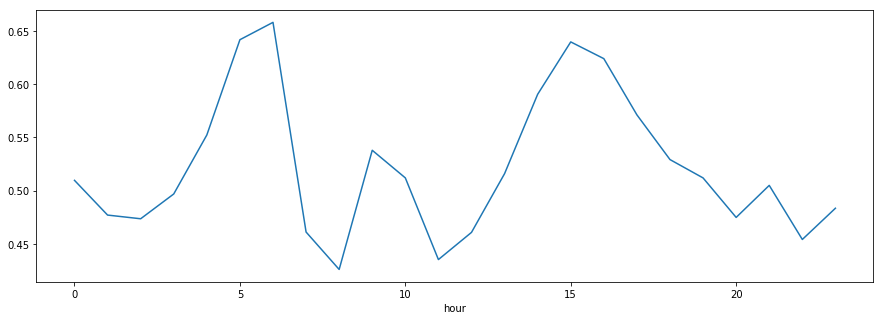

In [40]:
alpha_profile = alpha_hist.groupby('hour').agg({"pi+": "mean", "pi-": "mean"})
alpha_profile['alpha'] = alpha_profile['pi+']/(alpha_profile['pi+']+alpha_profile['pi-'])
alpha_profile['alpha'].plot(figsize=(15,5))
alpha_list = alpha_profile['alpha'].values.tolist()
alpha_hour = pd.Series(np.tile(alpha_list, 365))

In [60]:
strategy3b = pd.DataFrame()
strategy3b = prices[prices.index.year == 2017]
strategy3b['hour'] = strategy3b.index.hour
strategy3b['alpha'] = alpha_hour.values
strategy3b['quantile'] = 5*round((strategy3b['alpha']*100)/5,0)
strategy3b['quantile'] = 'q' + strategy3b['quantile'].astype(str).str.slice(stop=2)
strategy3b['Bid'] = forecast_df.set_index('dato').lookup(strategy3b.index, strategy3b['quantile'])/1000
strategy3b['Production'] = forecast_df['meas'].values/1000
strategy3b['Dayahead Revenue'] = strategy3b['Bid']*strategy3['DK1']
strategy3b['Delta'] = strategy3b['Production'] - strategy3b['Bid']
strategy3b_up = strategy3b[strategy3b['Delta'] <= 0]
strategy3b_down = strategy3b[strategy3b['Delta'] > 0]
strategy3b_up['Regulation Revenue'] = strategy3b_up['DK1_up']*strategy3b_up['Delta']
strategy3b_down['Regulation Revenue'] = strategy3b_down['DK1_down']*strategy3b_down['Delta']
strategy3b_revenue = strategy3b_up['Regulation Revenue'].sum() + strategy3b_up['Dayahead Revenue'].sum() + strategy3b_down['Regulation Revenue'].sum() + strategy3b_down['Dayahead Revenue'].sum()
strategy3b_ratio = strategy3b_revenue/reference_revenue
strategy3b_ratio

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

0.9708389147597347

Using mean optimal alpha for months:

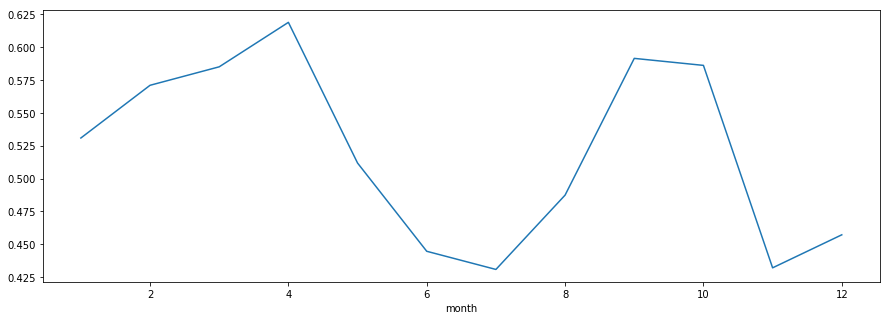

In [44]:
alpha_month = alpha_hist.groupby('month').agg({"pi+": "mean", "pi-": "mean"})
alpha_month['alpha'] = alpha_month['pi+']/(alpha_month['pi+']+alpha_month['pi-'])
alpha_month['alpha'].plot(figsize=(15,5))
alpha_month_hour = alpha_month['alpha'].repeat([24*31,24*28,24*31,24*30,24*31,24*30,24*31,24*31,24*30,24*31,24*30,24*31]).values

In [45]:
strategy3c = pd.DataFrame()
strategy3c = prices[prices.index.year == 2017]
strategy3c['month'] = strategy3c.index.month
strategy3c['alpha'] = alpha_month_hour
strategy3c['quantile'] = 5*round((strategy3c['alpha']*100)/5,0)
strategy3c['quantile'] = 'q' + strategy3c['quantile'].astype(str).str.slice(stop=2)
strategy3c['Bid'] = forecast_df.set_index('dato').lookup(strategy3c.index, strategy3c['quantile'])/1000
strategy3c['Production'] = forecast_df['meas'].values/1000
strategy3c['Dayahead Revenue'] = strategy3c['Bid']*strategy3['DK1']
strategy3c['Delta'] = strategy3c['Production'] - strategy3c['Bid']
strategy3c_up = strategy3c[strategy3c['Delta'] <= 0]
strategy3c_down = strategy3c[strategy3c['Delta'] > 0]
strategy3c_up['Regulation Revenue'] = strategy3c_up['DK1_up']*strategy3c_up['Delta']
strategy3c_down['Regulation Revenue'] = strategy3c_down['DK1_down']*strategy3c_down['Delta']

strategy3c_revenue = strategy3c_up['Regulation Revenue'].sum() + strategy3c_up['Dayahead Revenue'].sum() + strategy3c_down['Regulation Revenue'].sum() + strategy3c_down['Dayahead Revenue'].sum()
strategy3c_ratio = strategy3c_revenue/reference_revenue
strategy3c_ratio

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

0.970255159830728

# Results

In [46]:
print('Dummy strategy performance ratio: {}%'.format(round(strategy1_ratio*100,2)))
print('Deterministic strategy performance ratio: {}%'.format(round(strategy2_ratio*100,2)))
print('Probabilistic A strategy performance ratio: {}%'.format(round(strategy3_ratio*100,2)))
print('Probabilistic B strategy performance ratio: {}%'.format(round(strategy3b_ratio*100,2)))
print('Probabilistic C strategy performance ratio: {}%'.format(round(strategy3c_ratio*100,2)))

Dummy strategy performance ratio: 89.88%
Deterministic strategy performance ratio: 97.02%
Probabilistic A strategy performance ratio: 97.05%
Probabilistic B strategy performance ratio: 97.08%
Probabilistic C strategy performance ratio: 97.03%


(125000000.0, 148000000.0)

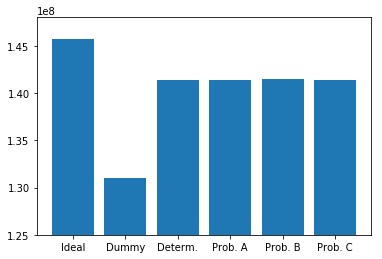

In [47]:
y = [reference_revenue, strategy1_revenue, strategy2_revenue, strategy3_revenue, strategy3b_revenue, strategy3c_revenue]
plt.bar(['Ideal', 'Dummy', 'Determ.', 'Prob. A', 'Prob. B', 'Prob. C'] , y)
plt.ylim([1.25e8, 1.48e8])

(141250000.0, 141500000.0)

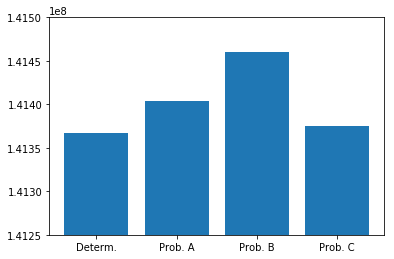

In [51]:
y = [strategy2_revenue, strategy3_revenue, strategy3b_revenue, strategy3c_revenue]
plt.bar(['Determ.', 'Prob. A', 'Prob. B', 'Prob. C'] , y)
plt.ylim([1.4125e8, 1.4150e8])